In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import requests
from termcolor import colored
import json
import numpy as np

In [132]:
merged_df = pd.read_csv("Resources/merged_df.csv")
merged_df = merged_df.drop(["Unnamed: 0"], axis=1)
merged_df["Year Released"] = merged_df["Year Released"].astype("str")
merged_df

,Film,Main Character,BoxOffice (domestic),Year Released,Profits (Domestic),Budget,Box Office Sales (Global),Profits (Global),Total Average Rating
0,Iron Man,Iron Man,318298180.0,2008,178298180.0,140000000,585174222,445174222,7.7
1,The Incredible Hulk,The Hulk,134518390.0,2008,-15481610.0,150000000,163712074,13712074,6.5
2,Iron Man 2,Iron Man,312057433.0,2010,112057433.0,200000000,623933331,423933331,6.9
3,Thor,Thor,181015141.0,2011,31015141.0,150000000,449326618,299326618,6.8
4,Captain America The First Avenger,Captain America,176636816.0,2011,36636816.0,140000000,370569774,230569774,6.8
5,Iron Man 3,Iron Man,408992272.0,2013,208992272.0,200000000,1215439994,1015439994,7.0
6,Thor The Dark World,Thor,206360018.0,2013,36360018.0,170000000,644571402,474571402,6.8
7,Captain America The Winter Soldier,Captain America,228636083.0,2014,58636083.0,170000000,714766572,544766572,7.8
8,Guardians of the Galaxy,Starlord,270592504.0,2014,100592504.0,170000000,773328629,603328629,8.0
9,Ant Man,Ant-Man,138002223.0,2015,8002223.0,130000000,519311965,389311965,7.2


In [157]:
B_v_S = merged_df[["Budget","Box Office Sales (Global)"]]
B_v_S.corr()

,Budget,Box Office Sales (Global)
Budget,1.000000,0.768497
Box Office Sales (Global),0.768497,1.000000


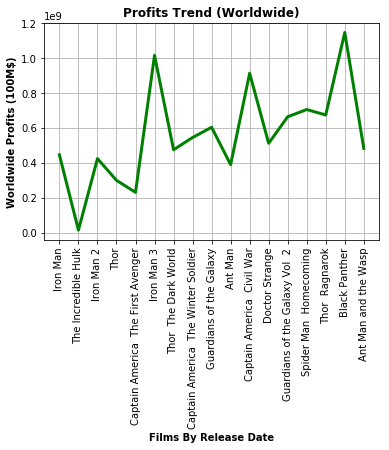

In [152]:
x_axis = merged_df["Film"]
sales_plot_global = plt.plot(x_axis, merged_df["Profits (Global)"], linewidth=3, color="green")
plt.xticks(rotation=90)
plt.grid()
plt.title("Profits Trend (Worldwide)", fontweight="bold")
plt.ylabel("Worldwide Profits (100M$)", fontweight="bold")
plt.xlabel('Films By Release Date', fontweight="bold")

plt.show()

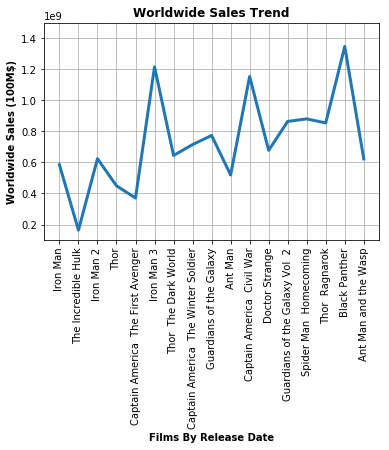

In [151]:
x_axis = merged_df["Film"]
sales_plot_global = plt.plot(x_axis, merged_df["Box Office Sales (Global)"], linewidth=3,)
plt.xticks(rotation=90)
plt.grid()
plt.ylim(100000000, 1500000000)
plt.title("Worldwide Sales Trend", fontweight="bold")
plt.ylabel("Worldwide Sales (100M$)", fontweight="bold")
plt.xlabel('Films By Release Date', fontweight="bold")

plt.show()

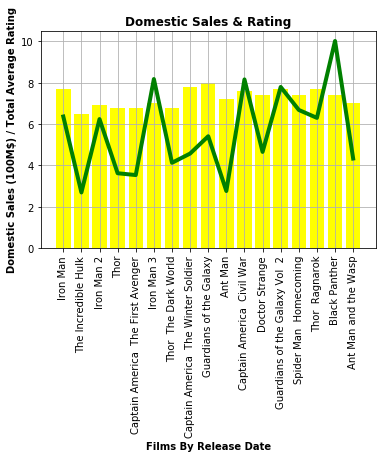

In [150]:
x_axis = merged_df["Film"]
plt.plot(x_axis, merged_df["BoxOffice (domestic)"]/50000000, linewidth=4, color="green")
plt.bar(x_axis, merged_df["Total Average Rating"], color="yellow")
plt.xticks(rotation=90)
plt.grid()
plt.title("Domestic Sales & Rating", fontweight="bold")
plt.ylabel("Domestic Sales (100M$) / Total Average Rating", fontweight="bold")
plt.xlabel('Films By Release Date', fontweight="bold")

plt.show()

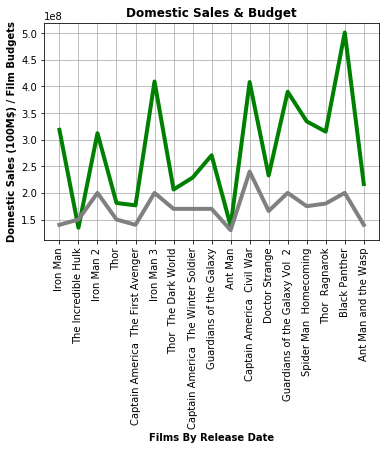

In [155]:
x_axis = merged_df["Film"]
plt.plot(x_axis, merged_df["BoxOffice (domestic)"], linewidth=4, color="green")
plt.plot(x_axis, merged_df["Budget"], color="grey", linewidth=4)
plt.xticks(rotation=90)
plt.grid()
plt.title("Domestic Sales & Budget", fontweight="bold")
plt.ylabel("Domestic Sales (100M$) / Film Budgets", fontweight="bold")
plt.xlabel('Films By Release Date', fontweight="bold")

plt.show()

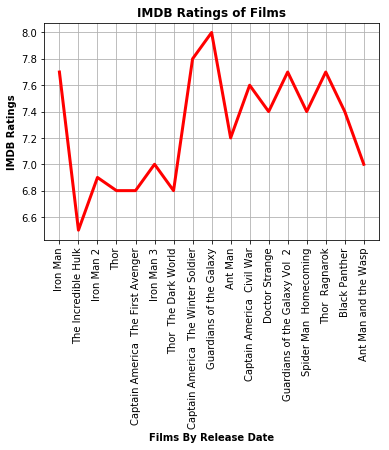

In [147]:
x_axis = merged_df["Film"]
ratings_plot_global = plt.plot(x_axis, merged_df["Total Average Rating"], linewidth=3, color="red")
plt.xlabel('Films By Release Date', fontweight="bold")
plt.ylabel("IMDB Ratings", fontweight="bold")
plt.title("IMDB Ratings of Films", fontweight="bold")
plt.xticks(rotation=90)
plt.grid()

plt.show()

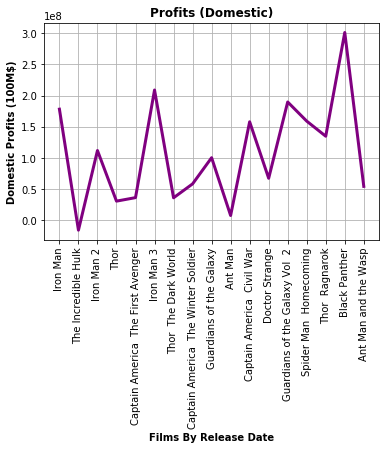

In [153]:
x_axis = merged_df["Film"]
profits_plot_global = plt.plot(x_axis, merged_df["Profits (Domestic)"], linewidth=3, color="purple")
plt.xlabel('Films By Release Date', fontweight="bold")
plt.ylabel("Domestic Profits (100M$)", fontweight="bold")
plt.title("Profits (Domestic)", fontweight="bold")
plt.xticks(rotation=90)
plt.grid()

plt.show()

In [49]:
character_counts = merged_df.groupby("Main Character")["Film"].count()

character_counts = character_counts.sort_values(ascending=False)
character_counts

Main Character
Thor               3
Iron Man           3
Captain America    3
Starlord           2
Ant-Man            2
The Hulk           1
Spider-Man         1
Doctor Strange     1
Black Panther      1
Name: Film, dtype: int64

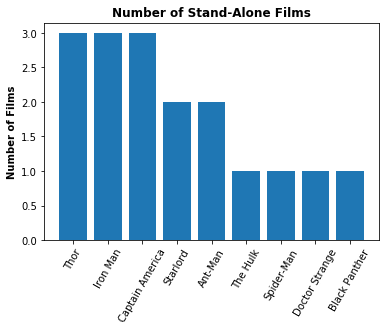

In [149]:
char = ['Thor', 'Iron Man', 'Captain America', 'Starlord',
        'Ant-Man', 'The Hulk', 'Spider-Man', 'Doctor Strange', 'Black Panther']

x_axis = np.arange(len(character_counts))
plt.xticks(rotation=60)
plt.bar(x_axis, character_counts, tick_label=char, align="center")
plt.ylabel("Number of Films", fontweight="bold")
plt.title("Number of Stand-Alone Films", fontweight="bold")

plt.show()

In [51]:
merged_df["Budget"].sum()

2921000000

In [52]:
merged_df["BoxOffice (domestic)"].sum()

4772516396.0

In [53]:
total_profit = merged_df["BoxOffice (domestic)"].sum() - merged_df["Budget"].sum()
total_profit

1851516396.0

In [129]:
merged_df.groupby("Main Character").sum()

,BoxOffice (domestic),Profits (Domestic),Budget,Box Office Sales (Global),Profits (Global),Total Average Rating
Main Character,,,,,,
Ant-Man,3.546510e+08,62650963.0,270000000,1141691541,871691541,14.2
Black Panther,5.011050e+08,301105037.0,200000000,1346739107,1146739107,7.4
Captain America,8.133535e+08,253353453.0,550000000,2238640841,1688640841,22.2
Doctor Strange,2.326307e+08,67630718.0,166000000,677718395,511718395,7.4
Iron Man,1.039348e+09,499347885.0,540000000,2424547547,1884547547,21.6
Spider-Man,3.341668e+08,159166825.0,175000000,880166924,705166924,7.4
Starlord,6.603967e+08,290396721.0,370000000,1637084680,1267084680,15.7
The Hulk,1.345184e+08,-15481610.0,150000000,163712074,13712074,6.5
Thor,7.023464e+08,202346404.0,500000000,1947875146,1447875146,21.3


In [130]:
character_breakdown = merged_df.groupby("Main Character").sum()
character_breakdown = character_breakdown.loc[['Captain America', 'Iron Man', 'Thor'], ['Profits (Domestic)']]
character_breakdown = character_breakdown.sort_values(by=['Profits (Domestic)'], ascending=False)
character_breakdown

,Profits (Domestic)
Main Character,
Iron Man,499347885.0
Captain America,253353453.0
Thor,202346404.0


In [55]:
top_5_boxoffice_dom = merged_df[["Film", "BoxOffice (domestic)"]]
top_5_boxoffice_dom = top_5_boxoffice_dom.sort_values(by="BoxOffice (domestic)", ascending=False).head()
top_5_boxoffice_dom = top_5_boxoffice_dom.reset_index()
top_5_boxoffice_dom.index = np.arange(1, 6)
top_5_boxoffice_dom = top_5_boxoffice_dom.drop("index", axis=1)
top_5_boxoffice_dom

,Film,BoxOffice (domestic)
1,Black Panther,501105037.0
2,Iron Man 3,408992272.0
3,Captain America Civil War,408080554.0
4,Guardians of the Galaxy Vol 2,389804217.0
5,Spider Man Homecoming,334166825.0


In [ ]:
top_5_boxoffice_plot = plt.plot()

In [65]:
top_5_boxoffice_glo = merged_df[["Film", "Box Office Sales (Global)"]]
top_5_boxoffice_glo = top_5_boxoffice_glo.sort_values(by="Box Office Sales (Global)", ascending=False).head()
top_5_boxoffice_glo = top_5_boxoffice_glo.reset_index()
top_5_boxoffice_glo.index = np.arange(1, 6)
top_5_boxoffice_glo = top_5_boxoffice_glo.drop("index", axis=1)
top_5_boxoffice_glo

,Film,Box Office Sales (Global)
1,Black Panther,1346739107
2,Iron Man 3,1215439994
3,Captain America Civil War,1153304495
4,Spider Man Homecoming,880166924
5,Guardians of the Galaxy Vol 2,863756051


In [57]:
top_5_profits_dom = merged_df[["Film", "Profits (Domestic)"]]
top_5_profits_dom = top_5_profits_dom.sort_values(by="Profits (Domestic)", ascending=False).head()
top_5_profits_dom = top_5_profits_dom.reset_index()
top_5_profits_dom.index = np.arange(1, 6)
top_5_profits_dom = top_5_profits_dom.drop("index", axis=1)
top_5_profits_dom

,Film,Profits (Domestic)
1,Black Panther,301105037.0
2,Iron Man 3,208992272.0
3,Guardians of the Galaxy Vol 2,189804217.0
4,Iron Man,178298180.0
5,Spider Man Homecoming,159166825.0


In [58]:
top_5_profits_glo = merged_df[["Film", "Profits (Global)"]]
top_5_profits_glo = top_5_profits_glo.sort_values(by="Profits (Global)", ascending=False).head()
top_5_profits_glo = top_5_profits_glo.reset_index()
top_5_profits_glo.index = np.arange(1, 6)
top_5_profits_glo

,index,Film,Profits (Global)
1,15,Black Panther,1146739107
2,5,Iron Man 3,1015439994
3,10,Captain America Civil War,913304495
4,13,Spider Man Homecoming,705166924
5,14,Thor Ragnarok,673977126


In [137]:
top_5_imdb_rating = merged_df[["Film", "Total Average Rating"]]
top_5_imdb_rating = top_5_imdb_rating.sort_values(by="Total Average Rating", ascending=False).head()
top_5_imdb_rating = top_5_imdb_rating.reset_index()
top_5_imdb_rating.index = np.arange(1, 6)
top_5_imdb_rating = top_5_imdb_rating.drop("index", axis=1)
top_5_imdb_rating

,Film,Total Average Rating
1,Guardians of the Galaxy,8.0
2,Captain America The Winter Soldier,7.8
3,Thor Ragnarok,7.7
4,Guardians of the Galaxy Vol 2,7.7
5,Iron Man,7.7


In [34]:
top_5_film_budget = merged_df[["Film", "Budget"]]
top_5_film_budget = top_5_film_budget.sort_values(by="Budget", ascending=False).head()
top_5_film_budget = top_5_film_budget.reset_index()
top_5_film_budget.index = np.arange(1, 6)
top_5_film_budget = top_5_film_budget.drop("index", axis=1)
top_5_film_budget

,Film,Budget
1,Captain America Civil War,240000000
2,Iron Man 2,200000000
3,Black Panther,200000000
4,Iron Man 3,200000000
5,Guardians of the Galaxy Vol 2,200000000


In [158]:
marvel_salaries_df = pd.read_csv("Resources/Marvel Characters Ratings and Actors Salaries.csv")
marvel_salaries_df

,Movie,Actor Name,Salary,Fan Rating,Cinematic Fan Rating,Movie.1,Actor Name.1,Salary.1,Movie.2,Actor Name.2,Salary.2
0,Ant-Man,Paul Rudd,"1,500,000",38,16,Ant-Man and The Wasp,Paul Rudd,"10,000,000",Captain America Civil War,Chris Evans,"6,900,000"
1,Black Panther,Chadwidk Boseman,"2,000,000",34,11,Captain America The Winter Soldier,Chris Evans,"3,200,000",Iron Man 3,Robert Downey Jr.,"20,000,000"
2,Captain America,Chris Evans,"1,000,000",3,6,Guardians Of The Galaxy 2 (Starlord),Chris Pratt,"6,600,000",Thor Ragnarok,Chris Hemsworth,"10,000,000"
3,Captain Marvel,Brie Larson,"5,000,000",48,78,Iron Man 2,Robert Downey Jr.,"10,000,000",NaN,NaN,NaN
4,Doctor Strange,Benedict Cumberbatch,"5,513,655",8,3,Thor The Dark World,Chris Hemsworth,"6,000,000",NaN,NaN,NaN
5,Guardians Of The Galaxy (Star-Lord),Chris Pratt,"1,500,000",21,13,NaN,NaN,NaN,NaN,NaN,NaN
6,Iron Man,Robert Downey Jr.,"500,000",4,4,NaN,NaN,NaN,NaN,NaN,NaN
7,Spider Man Homecoming,Tom Holland,"2,000,000",1,2,NaN,NaN,NaN,NaN,NaN,NaN
8,The Incredible Hulk,Edward Norton,NaN,6,10,NaN,NaN,NaN,NaN,NaN,NaN
9,Thor,Chris Hemsworth,"200,000",2,1,NaN,NaN,NaN,NaN,NaN,NaN
